In [1]:
import torch
from torch_geometric.data import Data
# draw the graph
import networkx as nx
import matplotlib.pyplot as plt
# summary
from torchinfo import summary
# graphnet
from graphnet.models.gnn import DynEdge

/home/xt/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


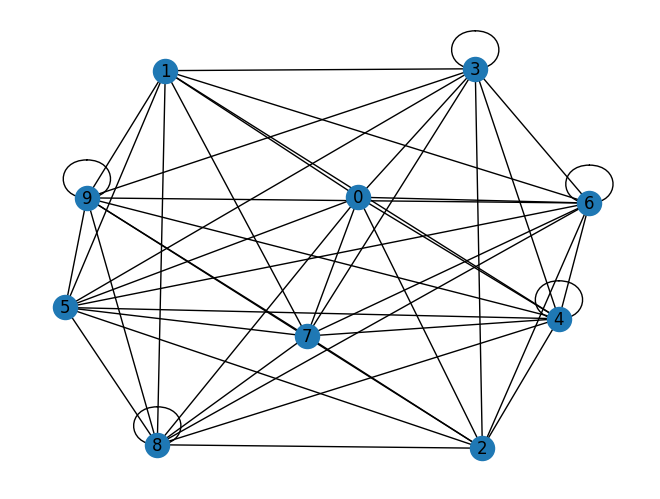

In [2]:
# 10 nodes, each node has 5 features
x = torch.rand((10, 5))
# randomly generate 100 edges in this graph
# the number of edges can be anything >=0 and <= 10!
edge_index = torch.randint(low=0, high=10, size=(2, 100), dtype=torch.long)
# batch
batch = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=torch.long)
# n_pulses
n_pulses = torch.tensor([1, 1])
# n_pulses = torch.tensor([1.1, 1])
# put the data together by torch_geometric.data.Data
data = Data(x=x, edge_index=edge_index, batch=batch, n_pulses = n_pulses)

# draw the graph
def visualize(data):
    G = nx.Graph()
    G.add_nodes_from(range(data.x.size(0)))
    G.add_edges_from(data.edge_index.t().tolist())
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()

visualize(data)

In [3]:
model = DynEdge(nb_inputs=5)
summary(model)

graphnet [MainProcess] INFO     2023-09-03 13:42:19 - DynEdge.__init__ - Writing log to logs/graphnet_20230903-134219.log


Layer (type:depth-idx)                   Param #
DynEdge                                  --
├─LeakyReLU: 1-1                         --
├─ModuleList: 1-2                        --
│    └─DynEdgeConv: 2-1                  --
│    │    └─SumAggregation: 3-1          --
│    │    └─Sequential: 3-2              36,992
│    └─DynEdgeConv: 2-2                  --
│    │    └─SumAggregation: 3-3          --
│    │    └─Sequential: 3-4              258,640
│    └─DynEdgeConv: 2-3                  --
│    │    └─SumAggregation: 3-5          --
│    │    └─Sequential: 3-6              258,640
│    └─DynEdgeConv: 2-4                  --
│    │    └─SumAggregation: 3-7          --
│    │    └─Sequential: 3-8              258,640
├─Sequential: 1-3                        --
│    └─Linear: 2-5                       349,440
│    └─LeakyReLU: 2-6                    --
│    └─Linear: 2-7                       86,272
│    └─LeakyReLU: 2-8                    --
├─Sequential: 1-4                        --

In [4]:
output = model(data)
print(output)
print(output.shape)# [number_of_nodes, readout_layer_sizes]

tensor([[-1.1352e-04,  1.0242e-01, -4.6683e-04,  ..., -2.2144e-04,
         -2.8893e-04, -5.6473e-04],
        [-5.3937e-04,  1.6358e-01, -7.5320e-04,  ..., -4.8466e-04,
         -4.6628e-04, -1.2311e-03],
        [-5.2525e-04,  1.7628e-01, -1.0273e-03,  ..., -1.5681e-04,
         -2.5328e-04, -1.0502e-03],
        ...,
        [-4.9287e-04,  1.5419e-01, -7.4365e-04,  ..., -3.8234e-04,
         -6.2180e-04, -1.1244e-03],
        [-5.1032e-04,  1.4895e-01, -8.3835e-04,  ..., -3.0791e-04,
         -4.9101e-04, -1.0827e-03],
        [-3.3223e-04,  1.4747e-01, -8.2551e-04,  ..., -2.5814e-04,
         -3.9263e-04, -9.9188e-04]], grad_fn=<LeakyReluBackward0>)
torch.Size([10, 128])
